In [6]:
cd /home/diegodp/Documents/PhD/Paper_3/SolO_SDO_EUI/Scripts

/home/diegodp/Documents/PhD/Paper_3/SolO_SDO_EUI/Scripts


In [7]:
from Plasma.SoloData import SoloManager
from datetime import datetime 
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as c

from os import makedirs

In [8]:
start = datetime(2020, 5, 30, 12)
end = datetime(2020, 6, 2)
save_path = "/home/diegodp/Documents/PhD/Paper_3/SolO_SDO_EUI/unsafe/insituData/"

insituObject = SoloManager(
    times=(start, end),
    objCad=60,
    cdfPath=
    "/home/diegodp/Documents/PhD/Paper_3/SolO_SDO_EUI/unsafe/soloData/",)
        

                                    V_R         V_T         V_N          N  \
2020-05-30 10:31:00.868684   240.156616   72.458153  -62.767975   0.189155   
2020-05-30 10:31:04.868691     0.000000   -0.000000    0.000000   0.000000   
2020-05-30 10:31:08.868698     0.000000   -0.000000    0.000000   0.000000   
2020-05-30 10:31:12.868704  1396.377563  403.789978  278.365112   0.017727   
2020-05-30 10:31:16.868711     0.000000   -0.000000    0.000000   0.000000   
...                                 ...         ...         ...        ...   
2020-06-01 13:31:53.174014   306.411926  -28.401413  -12.729091  42.536343   
2020-06-01 13:31:57.174021   309.044220  -29.833105  -12.794650  41.162594   
2020-06-01 13:32:01.174028   307.854126  -29.064562  -12.626145  42.203960   
2020-06-01 13:32:05.174034   307.972900  -28.791233  -12.782420  41.559258   
2020-06-01 13:32:09.174041   307.930878  -28.788877  -13.301455  41.751003   

                                    T  validity  
2020-05-30 10

In [9]:
df = insituObject.df

Np = df["N"]
Vx = df["V_R"]
T = df["T"]
Mf = c.m_p.value * Np * 10**15 * (Vx)

<ipython-input-10-4175cf1255e4>:47: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


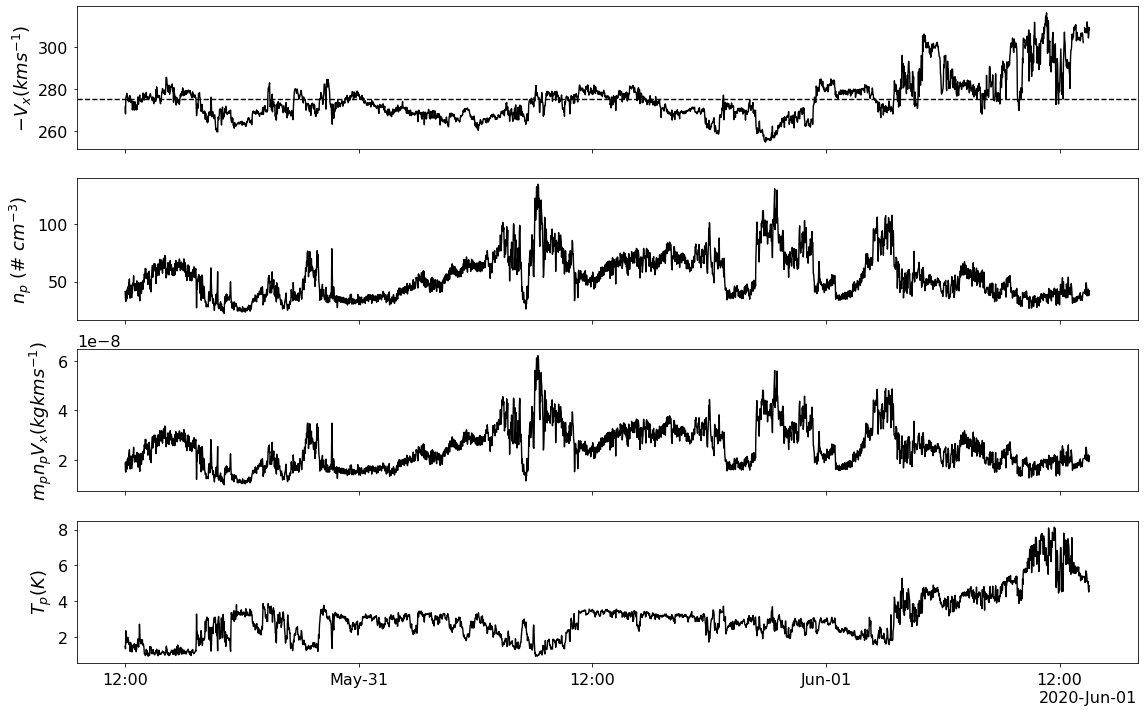

In [10]:
plt.style.use('seaborn-paper')

matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

th_speed = Vx.mean()  # Threshold speed for fast swind

# Figure
# Width and marker size
figwidth = 10
msize = 5

fig, axs = plt.subplots(
    4, 1, figsize=(16,2*5), sharex=True, constrained_layout=True
)

ax1 = axs[0]
ax1.plot(Vx, color='black', label='Vp [GSE]')
ax1.set_ylabel(r'$-{V_x}(km s^{-1})$')
ax1.axhline(th_speed, linestyle='--', color='black')

# Proton Density
axN = axs[1]
axN.plot(Np, color='black',label = 'N_p')
axN.set_ylabel(r'$n_p$ (# $cm^{-3}$)')

# Mass Flux
axMf = axs[2]
axMf.plot(Mf, label='Mass Flux', color='black')
axMf.set_ylabel(r'$m_{p}n_{p} V_x (kg km s^{-1})$')

# Temperature
axT = axs[3]
axT.plot(T, color='black', label=r'$T_p$')
axT.set_ylabel(r'$T_p (K)$')


for ax in axs:
    locator = mdates.HourLocator([0, 12])
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
makedirs(save_path, exist_ok=True)
plt.savefig(f"{save_path}SolO_Summary.png", format = "png")
plt.show()
plt.close()

In [11]:
save_path

'/home/diegodp/Documents/PhD/Paper_3/SolO_SDO_EUI/unsafe/insituData/'